In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy import stats

In [3]:
pop_data = pd.read_csv('../Inputs/POPSTATSInputs/population_estimates_project1.csv')
pop_data

,Geography,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,"309,326,085","311,580,009","313,874,218","316,057,727","318,386,421","320,742,673","323,071,342","325,147,121","327,167,434"
1,.Alabama,"4,785,448","4,798,834","4,815,564","4,830,460","4,842,481","4,853,160","4,864,745","4,875,120","4,887,871"
2,.Alaska,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
3,.Arizona,"6,407,774","6,473,497","6,556,629","6,634,999","6,733,840","6,833,596","6,945,452","7,048,876","7,171,646"
4,.Arkansas,"2,921,978","2,940,407","2,952,109","2,959,549","2,967,726","2,978,407","2,990,410","3,002,997","3,013,825"
5,.California,"37,320,903","37,641,823","37,960,782","38,280,824","38,625,139","38,953,142","39,209,127","39,399,349","39,557,045"
6,.Colorado,"5,048,281","5,121,771","5,193,721","5,270,482","5,351,218","5,452,107","5,540,921","5,615,902","5,695,564"
7,.Connecticut,"3,579,125","3,588,023","3,594,395","3,594,915","3,594,783","3,587,509","3,578,674","3,573,880","3,572,665"
8,.Delaware,"899,595","907,316","915,188","923,638","932,596","941,413","949,216","957,078","967,171"
9,.District of Columbia,"605,085","619,602","634,725","650,431","662,513","675,254","686,575","695,691","702,455"


In [4]:
pop_data = pop_data.loc[[2, 6, 38, 48]]
pop_data

,Geography,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,.Alaska,"713,906","722,038","730,399","737,045","736,307","737,547","741,504","739,786","737,438"
6,.Colorado,"5,048,281","5,121,771","5,193,721","5,270,482","5,351,218","5,452,107","5,540,921","5,615,902","5,695,564"
38,.Oregon,"3,837,532","3,871,728","3,899,118","3,922,908","3,964,106","4,016,918","4,091,404","4,146,592","4,190,713"
48,.Washington,"6,742,902","6,821,655","6,892,876","6,962,906","7,052,439","7,163,543","7,294,680","7,425,432","7,535,591"


In [5]:
pop_data = pop_data.rename(columns={
    'Geography':'State'
})
pop_data = pop_data.transpose()
pop_data

,2,6,38,48
State,.Alaska,.Colorado,.Oregon,.Washington
2010,"713,906","5,048,281","3,837,532","6,742,902"
2011,"722,038","5,121,771","3,871,728","6,821,655"
2012,"730,399","5,193,721","3,899,118","6,892,876"
2013,"737,045","5,270,482","3,922,908","6,962,906"
2014,"736,307","5,351,218","3,964,106","7,052,439"
2015,"737,547","5,452,107","4,016,918","7,163,543"
2016,"741,504","5,540,921","4,091,404","7,294,680"
2017,"739,786","5,615,902","4,146,592","7,425,432"
2018,"737,438","5,695,564","4,190,713","7,535,591"


In [6]:
pop_data.columns = pop_data.iloc[0]
pop_data

State,.Alaska,.Colorado,.Oregon,.Washington
State,.Alaska,.Colorado,.Oregon,.Washington
2010,"713,906","5,048,281","3,837,532","6,742,902"
2011,"722,038","5,121,771","3,871,728","6,821,655"
2012,"730,399","5,193,721","3,899,118","6,892,876"
2013,"737,045","5,270,482","3,922,908","6,962,906"
2014,"736,307","5,351,218","3,964,106","7,052,439"
2015,"737,547","5,452,107","4,016,918","7,163,543"
2016,"741,504","5,540,921","4,091,404","7,294,680"
2017,"739,786","5,615,902","4,146,592","7,425,432"
2018,"737,438","5,695,564","4,190,713","7,535,591"


In [7]:
pop_data = pop_data.reset_index()
pop_data

State,index,.Alaska,.Colorado,.Oregon,.Washington
0,State,.Alaska,.Colorado,.Oregon,.Washington
1,2010,"713,906","5,048,281","3,837,532","6,742,902"
2,2011,"722,038","5,121,771","3,871,728","6,821,655"
3,2012,"730,399","5,193,721","3,899,118","6,892,876"
4,2013,"737,045","5,270,482","3,922,908","6,962,906"
5,2014,"736,307","5,351,218","3,964,106","7,052,439"
6,2015,"737,547","5,452,107","4,016,918","7,163,543"
7,2016,"741,504","5,540,921","4,091,404","7,294,680"
8,2017,"739,786","5,615,902","4,146,592","7,425,432"
9,2018,"737,438","5,695,564","4,190,713","7,535,591"


In [8]:
pop_data['.Alaska'] = pop_data['.Alaska'].str.replace(',', '')
pop_data['.Colorado'] = pop_data['.Colorado'].str.replace(',', '')
pop_data['.Oregon'] = pop_data['.Oregon'].str.replace(',', '')
pop_data['.Washington'] = pop_data['.Washington'].str.replace(',', '')
pop_data

State,index,.Alaska,.Colorado,.Oregon,.Washington
0,State,.Alaska,.Colorado,.Oregon,.Washington
1,2010,713906,5048281,3837532,6742902
2,2011,722038,5121771,3871728,6821655
3,2012,730399,5193721,3899118,6892876
4,2013,737045,5270482,3922908,6962906
5,2014,736307,5351218,3964106,7052439
6,2015,737547,5452107,4016918,7163543
7,2016,741504,5540921,4091404,7294680
8,2017,739786,5615902,4146592,7425432
9,2018,737438,5695564,4190713,7535591


In [9]:
pop_data = pop_data[1:]
pop_data = pop_data.rename(columns={
    '.Alaska':'Alaska',
    '.Colorado':'Colorado',
    '.Oregon':'Oregon',
    '.Washington':'Washington',
    'index':'Year'
})
pop_data

State,Year,Alaska,Colorado,Oregon,Washington
1,2010,713906,5048281,3837532,6742902
2,2011,722038,5121771,3871728,6821655
3,2012,730399,5193721,3899118,6892876
4,2013,737045,5270482,3922908,6962906
5,2014,736307,5351218,3964106,7052439
6,2015,737547,5452107,4016918,7163543
7,2016,741504,5540921,4091404,7294680
8,2017,739786,5615902,4146592,7425432
9,2018,737438,5695564,4190713,7535591


In [10]:
pop_data['Colorado'] = pop_data['Colorado'].astype('float')
pop_data['Washington'] = pop_data['Washington'].astype('float')
pop_data['Oregon'] = pop_data['Oregon'].astype('float')
pop_data['Alaska'] = pop_data['Alaska'].astype('float')
pop_data

State,Year,Alaska,Colorado,Oregon,Washington
1,2010,713906.0,5048281.0,3837532.0,6742902.0
2,2011,722038.0,5121771.0,3871728.0,6821655.0
3,2012,730399.0,5193721.0,3899118.0,6892876.0
4,2013,737045.0,5270482.0,3922908.0,6962906.0
5,2014,736307.0,5351218.0,3964106.0,7052439.0
6,2015,737547.0,5452107.0,4016918.0,7163543.0
7,2016,741504.0,5540921.0,4091404.0,7294680.0
8,2017,739786.0,5615902.0,4146592.0,7425432.0
9,2018,737438.0,5695564.0,4190713.0,7535591.0


In [11]:
annual_mj_data = pd.read_csv('../Inputs/SALESInputs/Yearly_MJ_Sales.csv')
annual_mj_data

,Year,Colorado,Washington,Oregon,Alaska
0,2010,NaN,NaN,NaN,NaN
1,2011,NaN,NaN,NaN,NaN
2,2012,NaN,NaN,NaN,NaN
3,2013,NaN,NaN,NaN,NaN
4,2014,6.835237e+08,91603000.0,NaN,NaN
5,2015,9.955913e+08,469291000.0,NaN,NaN
6,2016,1.307203e+09,729545000.0,353849600.0,NaN
7,2017,1.507702e+09,925243000.0,403801447.0,33586048.0
8,2018,1.410947e+09,830495000.0,512324664.0,56603388.0


In [12]:
pop_data['CO MJ Sales'] = annual_mj_data['Colorado']
pop_data['CO MJ Sales'] = pop_data['CO MJ Sales'].shift(1)
pop_data['AK MJ Sales'] = annual_mj_data['Alaska']
pop_data['AK MJ Sales'] = pop_data['AK MJ Sales'].shift(1)
pop_data['OR MJ Sales'] = annual_mj_data['Oregon']
pop_data['OR MJ Sales'] = pop_data['OR MJ Sales'].shift(1)
pop_data['WA MJ Sales'] = annual_mj_data['Washington']
pop_data['WA MJ Sales'] = pop_data['WA MJ Sales'].shift(1)
pop_data

State,Year,Alaska,Colorado,Oregon,Washington,CO MJ Sales,AK MJ Sales,OR MJ Sales,WA MJ Sales
1,2010,713906.0,5048281.0,3837532.0,6742902.0,NaN,NaN,NaN,NaN
2,2011,722038.0,5121771.0,3871728.0,6821655.0,NaN,NaN,NaN,NaN
3,2012,730399.0,5193721.0,3899118.0,6892876.0,NaN,NaN,NaN,NaN
4,2013,737045.0,5270482.0,3922908.0,6962906.0,NaN,NaN,NaN,NaN
5,2014,736307.0,5351218.0,3964106.0,7052439.0,6.835237e+08,NaN,NaN,91603000.0
6,2015,737547.0,5452107.0,4016918.0,7163543.0,9.955913e+08,NaN,NaN,469291000.0
7,2016,741504.0,5540921.0,4091404.0,7294680.0,1.307203e+09,NaN,353849600.0,729545000.0
8,2017,739786.0,5615902.0,4146592.0,7425432.0,1.507702e+09,33586048.0,403801447.0,925243000.0
9,2018,737438.0,5695564.0,4190713.0,7535591.0,1.410947e+09,56603388.0,512324664.0,830495000.0


In [13]:
pop_data['AK Per Capita MJ Sales'] = (pop_data['AK MJ Sales']/pop_data['Alaska'])
pop_data['WA Per Capita MJ Sales'] = (pop_data['WA MJ Sales']/pop_data['Washington'])
pop_data['OR Per Capita MJ Sales'] = (pop_data['OR MJ Sales']/pop_data['Oregon'])
pop_data['CO Per Capita MJ Sales'] = (pop_data['CO MJ Sales']/pop_data['Colorado'])
pop_data

State,Year,Alaska,Colorado,Oregon,Washington,CO MJ Sales,AK MJ Sales,OR MJ Sales,WA MJ Sales,AK Per Capita MJ Sales,WA Per Capita MJ Sales,OR Per Capita MJ Sales,CO Per Capita MJ Sales
1,2010,713906.0,5048281.0,3837532.0,6742902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,722038.0,5121771.0,3871728.0,6821655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,730399.0,5193721.0,3899118.0,6892876.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,737045.0,5270482.0,3922908.0,6962906.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,736307.0,5351218.0,3964106.0,7052439.0,6.835237e+08,NaN,NaN,91603000.0,NaN,12.988840,NaN,127.732367
6,2015,737547.0,5452107.0,4016918.0,7163543.0,9.955913e+08,NaN,NaN,469291000.0,NaN,65.511019,NaN,182.606698
7,2016,741504.0,5540921.0,4091404.0,7294680.0,1.307203e+09,NaN,353849600.0,729545000.0,NaN,100.010556,86.486106,235.918085
8,2017,739786.0,5615902.0,4146592.0,7425432.0,1.507702e+09,33586048.0,403801447.0,925243000.0,45.399680,124.604602,97.381524,268.470180
9,2018,737438.0,5695564.0,4190713.0,7535591.0,1.410947e+09,56603388.0,512324664.0,830495000.0,76.756809,110.209670,122.252386,247.727288


<IPython.core.display.Javascript object>


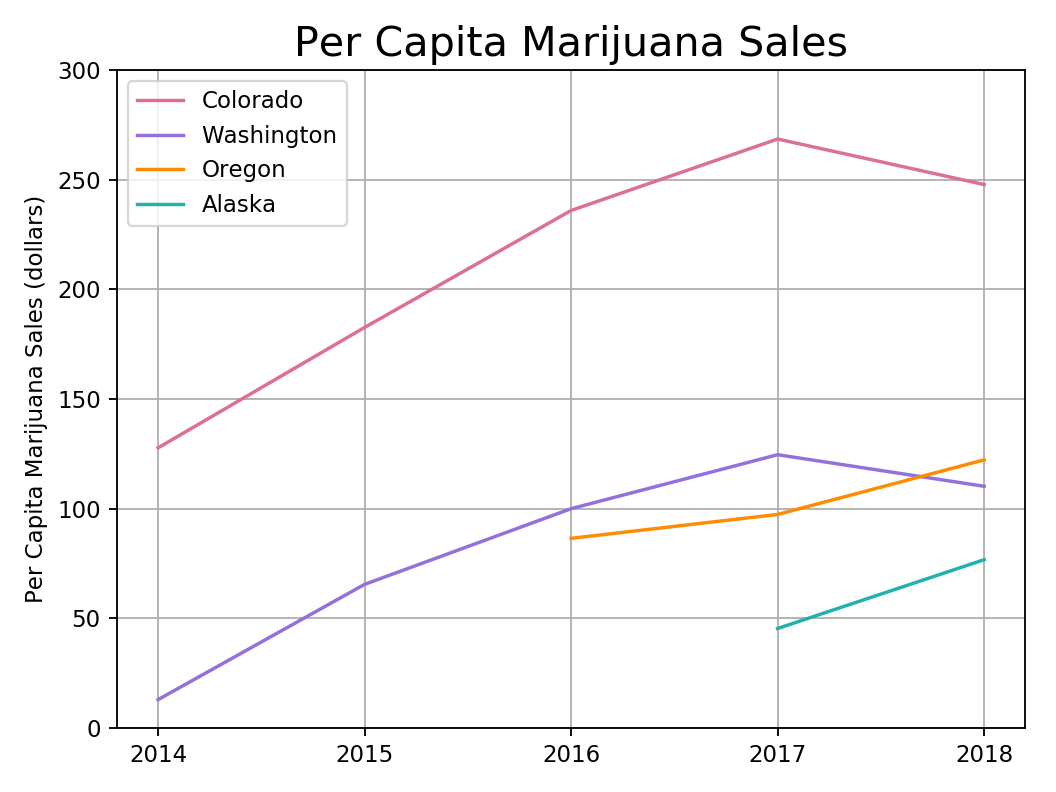

In [14]:
fig1,ax1=plt.subplots(sharex=True)

ax1.plot(pop_data['Year'], pop_data['CO Per Capita MJ Sales'], color='palevioletred', label='Colorado')
ax1.plot(pop_data['Year'], pop_data['WA Per Capita MJ Sales'], color='mediumpurple', label='Washington')
ax1.plot(pop_data['Year'], pop_data['OR Per Capita MJ Sales'], color='darkorange', label='Oregon')
ax1.plot(pop_data['Year'], pop_data['AK Per Capita MJ Sales'], color="lightseagreen", label='Alaska')

plt.title('Per Capita Marijuana Sales', fontsize=18)
plt.legend(loc="best")
plt.ylim(0, 300)
plt.ylabel('Per Capita Marijuana Sales (dollars)')

plt.tight_layout()
plt.grid()

plt.show()

In [15]:
plt.savefig('../SALES_Jason/per_capita_mj_sales.png')